In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [14]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [21]:
def loadDataset():
    filename = "./housedata/fin_house2.csv"
    df = pd.read_csv(filename,encoding='gbk')
    df.rename(columns={'idi':'id'},inplace=True) 
    
    #选取所需要的数据
    data_cluster = df[["id","price","unit_price","construction_area","lat","lng"]]
    
    print(data_cluster)
    
    #剔除带有空值的行    
    data_cluster = data_cluster.dropna()

    #转换为numpy数组类型
    arr_cluster = np.array(data_cluster).astype(np.float)
    return arr_cluster


"""1、加载数据"""
data_X = loadDataset()

            id  price  unit_price  construction_area        lat         lng
0            0  102.0     10933.6              93.29  30.702539  104.094544
1            1  110.4     14248.8              77.48  30.575829  104.075527
2            2  118.0     17281.8              68.28  30.714363  104.104490
3            3  146.0     15618.3              93.48  30.698195  104.104375
4            4   91.0     13787.9              66.00  30.690580  104.168389
...        ...    ...         ...                ...        ...         ...
100977  100979  100.0      8928.6             112.00  30.418783  103.822251
100978  100980   53.8      8508.6              63.23  31.002508  103.636278
100979  100981   38.0      7833.4              48.51  30.487885  103.897073
100980  100982  169.0      7971.7             212.00  30.422937  103.824768
100981  100983  150.0     12820.5             117.00  30.435704  103.824381

[100982 rows x 6 columns]


89982318538127.53
25619918682945.62
13337251510822.096
9205580106004.37
6890608651168.164
5796301923918.519
4930566241618.07
4258958514595.4688
3849388065655.6226
3499389629936.706


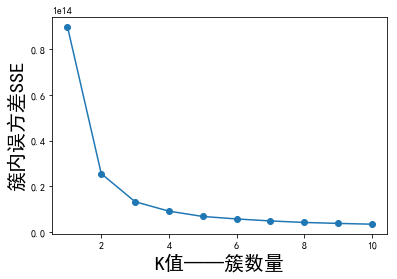

In [17]:
SSE = []
for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=100)
    km.fit(data_X)
        #获取K-means算法的SSE
    print(km.inertia_)
    SSE.append(km.inertia_)

plt.plot(range(1,11),SSE,marker="o")
plt.xlabel("K值——簇数量",size=20)
plt.ylabel("簇内误方差SSE",size=20)
plt.show()

[0.584288473380027]
[0.584288473380027, 0.5236256578359515]
[0.584288473380027, 0.5236256578359515, 0.47182244959840325]
[0.584288473380027, 0.5236256578359515, 0.47182244959840325, 0.4569926619720086]
[0.584288473380027, 0.5236256578359515, 0.47182244959840325, 0.4569926619720086, 0.44981149603079773]
[0.584288473380027, 0.5236256578359515, 0.47182244959840325, 0.4569926619720086, 0.44981149603079773, 0.42733800914247483]
[0.584288473380027, 0.5236256578359515, 0.47182244959840325, 0.4569926619720086, 0.44981149603079773, 0.42733800914247483, 0.41928329861236957]
[0.584288473380027, 0.5236256578359515, 0.47182244959840325, 0.4569926619720086, 0.44981149603079773, 0.42733800914247483, 0.41928329861236957, 0.41300622337261134]


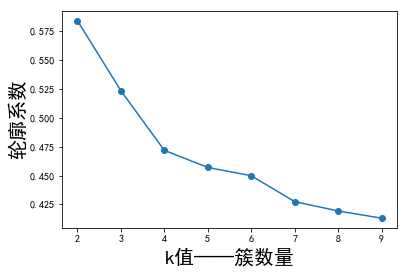

In [29]:
from sklearn.metrics import silhouette_score
Scores = []  # 存放轮廓系数
for k in range(2,10):
    kmeans = KMeans(n_clusters=k)  # 构造聚类器
    kmeans.fit(data_X)
    Scores.append(silhouette_score(data_X,kmeans.labels_,metric='euclidean'))
    print(Scores)
X = range(2,10)
plt.xlabel('k值——簇数量',size=20)
plt.ylabel('轮廓系数',size=20)
plt.plot(X,Scores,'o-')
plt.show()

In [22]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 23 10:09:15 2016
K-means cluster
@author: liudiwei
"""

import numpy as np

class KMeansClassifier():
    "this is a k-means classifier"
    
    
    def __init__(self, k=3, initCent='random', max_iter=5000):
        """构造函数，初始化相关属性"""
        self._k = k
        self._initCent = initCent#初始中心
        self._max_iter = max_iter#最大迭代
        #一个m*2的二维矩阵，矩阵第一列存储样本点所属的族的索引值，
        #第二列存储该点与所属族的质心的平方误差
        self._clusterAssment = None#样本点聚类结结构矩阵
        self._labels = None
        self._sse = None#SSE（Sum of squared errors）平方误差和
     
        
    def _calEDist(self, arrA, arrB):
        """
        功能：欧拉距离距离计算
        输入：两个一维数组
        """
        arrA_temp = arrA.copy()
        arrB_temp = arrB.copy()
        arrA_temp[0] = arrA_temp[0]*0.16
        arrA_temp[1] = arrA_temp[1]*0.005
        arrB_temp[0] = arrB_temp[0]*0.16
        arrB_temp[1] = arrB_temp[1]*0.005
        return np.math.sqrt(sum(np.power(arrA_temp - arrB_temp, 2)))
    
    
    def _calMDist(self, arrA, arrB):
        """
        功能：曼哈顿距离距离计算
        输入：两个一维数组
        """
        return sum(np.abs(arrA-arrB))


    def _randCent(self, data_X, k):
        """
        功能：随机选取k个质心
        输出：centroids #返回一个m*n的质心矩阵
        """
        n = data_X.shape[1] - 3 #获取特征值的维数(要删除一个用于标记的id列和经纬度值)
        centroids = np.empty((k,n))  #使用numpy生成一个k*n的矩阵，用于存储质心
        for j in range(n):
            minJ = min(data_X[:,j+1])
            rangeJ = max(data_X[:,j+1] - minJ)
            #使用flatten拉平嵌套列表(nested list)
            centroids[:, j] = (minJ + rangeJ * np.random.rand(k, 1)).flatten()
        return centroids 
    
    
    def fit(self, data_X):
        """
        输入：一个m*n维的矩阵
        """
        if not isinstance(data_X, np.ndarray) or \
               isinstance(data_X, np.matrixlib.defmatrix.matrix):
            try:
                data_X = np.asarray(data_X)
            except:
                raise TypeError("numpy.ndarray resuired for data_X")
                
        m = data_X.shape[0]  #获取样本的个数
        #一个m*2的二维矩阵，矩阵第一列存储样本点所属的族的编号，
        #第二列存储该点与所属族的质心的平方误差
        self._clusterAssment = np.zeros((m,2)) 
        
        #创建k个点，作为起始质心
        if self._initCent == 'random':
            self._centroids = self._randCent(data_X, self._k)
            
        clusterChanged = True
        #循环最大迭代次数
        for _ in range(self._max_iter): #使用"_"主要是因为后面没有用到这个值
            clusterChanged = False
            for i in range(m):   #将每个样本点分配到离它最近的质心所属的族
                minDist = np.inf #首先将minDist置为一个无穷大的数
                minIndex = -1    #将最近质心的下标置为-1
                for j in range(self._k): #次迭代用于寻找元素最近的质心
                    arrA = self._centroids[j,:]
                    arrB = data_X[i,1:4]
                    distJI = self._calEDist(arrA, arrB) #计算距离
                    if distJI < minDist:
                        minDist = distJI
                        minIndex = j
                if self._clusterAssment[i, 0] != minIndex or self._clusterAssment[i, 1] > minDist**2:
                    clusterChanged = True
                    self._clusterAssment[i,:] = minIndex, minDist**2
            if not clusterChanged:#若所有样本点所属的族都不改变,则已收敛,结束迭代
                break
            for i in range(self._k):#更新质心，将每个族中的点的均值作为质心
                index_all = self._clusterAssment[:,0] #取出样本所属簇的编号
                value = np.nonzero(index_all==i) #取出所有属于第i个簇的索引值
                ptsInClust = data_X[value[0]]    #取出属于第i个簇的所有样本点
                self._centroids[i,:] = np.mean(ptsInClust[:,1:4], axis=0) #计算均值,赋予新的质心
        
        self._labels = self._clusterAssment[:,0]
        self._sse = sum(self._clusterAssment[:,1])
    
    
    def predict(self, X):#根据聚类结果，预测新输入数据所属的族
        #类型检查
        if not isinstance(X,np.ndarray):
            try:
                X = np.asarray(X)
            except:
                raise TypeError("numpy.ndarray required for X")
        
        m = X.shape[0]#m代表样本数量
        preds = np.empty((m,))
        for i in range(m):#将每个样本点分配到离它最近的质心所属的族
            minDist = np.inf
            for j in range(self._k):
                distJI = self._calEDist(self._centroids[j,:], X[i,:])
                if distJI < minDist:
                    minDist = distJI
                    preds[i] = j
        return preds

        
class biKMeansClassifier():
    "this is a binary k-means classifier"
    
    def __init__(self, k=3):
        
        self._k = k
        self._centroids = None
        self._clusterAssment = None
        self._labels = None
        self._sse = None
        
    
    def _calEDist(self, arrA, arrB):
        """
        功能：欧拉距离距离计算
        输入：两个一维数组
        """
        return np.math.sqrt(sum(np.power(arrA-arrB, 2)))
        
    def fit(self, X):
        m = X.shape[0]
        self._clusterAssment = np.zeros((m,2))
        centroid0 = np.mean(X, axis=0).tolist()
        centList =[centroid0]
        for j in range(m):#计算每个样本点与质心之间初始的平方误差
            self._clusterAssment[j,1] = self._calEDist(np.asarray(centroid0), \
                                        X[j,:])**2
        
        while (len(centList) < self._k):
            lowestSSE = np.inf
            #尝试划分每一族,选取使得误差最小的那个族进行划分
            for i in range(len(centList)):
                index_all = self._clusterAssment[:,0] #取出样本所属簇的索引值
                value = np.nonzero(index_all==i) #取出所有属于第i个簇的索引值
                ptsInCurrCluster = X[value[0],:] #取出属于第i个簇的所有样本点
                clf = KMeansClassifier(k=2)
                clf.fit(ptsInCurrCluster)
                #划分该族后，所得到的质心、分配结果及误差矩阵
                centroidMat, splitClustAss = clf._centroids, clf._clusterAssment
                sseSplit = sum(splitClustAss[:,1])
                index_all = self._clusterAssment[:,0] 
                value = np.nonzero(index_all==i)
                sseNotSplit = sum(self._clusterAssment[value[0],1])
                if (sseSplit + sseNotSplit) < lowestSSE:
                    bestCentToSplit = i
                    bestNewCents = centroidMat
                    bestClustAss = splitClustAss.copy()
                    lowestSSE = sseSplit + sseNotSplit
            #该族被划分成两个子族后,其中一个子族的索引变为原族的索引
            #另一个子族的索引变为len(centList),然后存入centList
            bestClustAss[np.nonzero(bestClustAss[:,0]==1)[0],0]=len(centList)
            bestClustAss[np.nonzero(bestClustAss[:,0]==0)[0],0]=bestCentToSplit
            centList[bestCentToSplit] = bestNewCents[0,:].tolist()
            centList.append(bestNewCents[1,:].tolist())
            self._clusterAssment[np.nonzero(self._clusterAssment[:,0] == \
                                        bestCentToSplit)[0],:]= bestClustAss 
                   
        self._labels = self._clusterAssment[:,0] 
        self._sse = sum(self._clusterAssment[:,1])
        self._centroids = np.asarray(centList)
                                
    def predict(self, X):#根据聚类结果，预测新输入数据所属的族
        #类型检查
        if not isinstance(X,np.ndarray):
            try:
                X = np.asarray(X)
            except:
                raise TypeError("numpy.ndarray required for X")
        
        m = X.shape[0]#m代表样本数量
        preds = np.empty((m,))
        for i in range(m):#将每个样本点分配到离它最近的质心所属的族
            minDist = np.inf
            for j in range(self._k):
                distJI = self._calEDist(self._centroids[j,:],X[i,:])
                if distJI < minDist:
                    minDist = distJI
                    preds[i] = j
        return preds


                     k-means算法统计结果
 分组	总价（万）	单价（元/平米）  建筑面积（平米）   总计
 0         117 		14085   	84		13792
 1         218 		17234   	118		17038
 2         103 		9780   	104		14440
 3         143 		13093   	107		17212
 4         315 		26021   	116		7597
 5         133 		13495   	95		15194
 6         127 		13819   	90		15709


Text(0, 0.5, '总价(万元)')

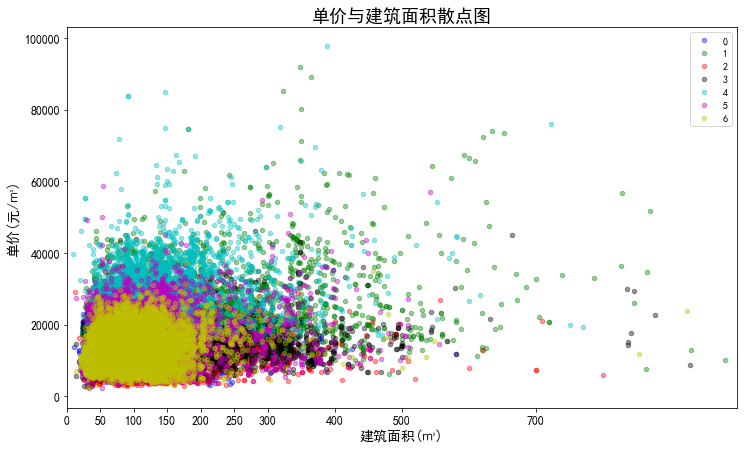

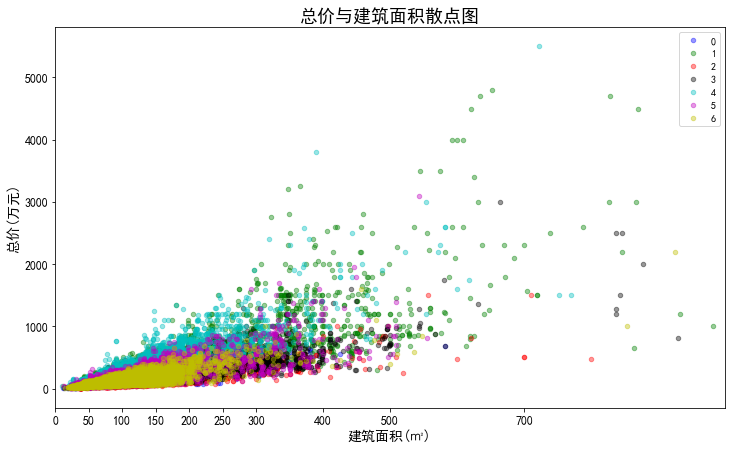

In [25]:
"""3、选定k值后，聚类分析，统计结果"""
#给定划分数量k
k = 7

#运行k-means算法    
clf = KMeans(k)
clf.fit(data_X)
labels = clf.labels_

#设置存储值
data_result = [] #聚类的原始样本集（numpy数组类型）
result_mean = []#各类样本集均值结果集
data_df = []#聚类的原始样本集（dataframe类型）
colors = ['b','g','r','k','c','m','y','#e24fff','#524C90','#845868']

#统计均值结果
for i in range(k):
    index = np.nonzero(labels==i)[0]#取出所有属于第i个簇的索引值
    data_i = data_X[index]    #取出属于第i个簇的所有样本点
    data_result.append(data_i)
    mean_data = data_i.mean(axis=0)
    mean_data = list(map(int,mean_data))
    result_mean.append(list(mean_data))

#变换数组结构
for i in range(k):
    data_temp = data_result[i]
    data = {"id":data_temp[:,0],
            "price":data_temp[:,1],
            "unit_price":data_temp[:,2],
            "construction_area":data_temp[:,3],
            "lat":data_temp[:,4],
            "lng":data_temp[:,5]}
    data_df_temp = pd.DataFrame(data,columns=["id","price","unit_price","construction_area","lat","lng"])
    data_df.append(data_df_temp)
    
#输出统计结果
gr = 0
print("                     k-means算法统计结果")
print(" 分组	总价（万）	单价（元/平米）  建筑面积（平米）   总计")
for i in result_mean:
    print(" "+str(gr)+"         "+str(i[1])+" 		"+str(i[2])+"   	"+str(i[3])+"\t\t"+str(len(data_df[gr])))
    gr = gr + 1
    

"""4、聚类结果：单价与建筑面积的散点图"""   
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.set_title("单价与建筑面积散点图",fontsize=18)
data_df[0].plot(x="construction_area", y="unit_price", kind="scatter",label="0",color=colors[0],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500,700],xlim=[0,1000])
data_df[1].plot(x="construction_area", y="unit_price", kind="scatter",label="1",color=colors[1],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500,700],xlim=[0,1000])
data_df[2].plot(x="construction_area", y="unit_price", kind="scatter",label="2",color=colors[2],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500,700],xlim=[0,1000])
data_df[3].plot(x="construction_area", y="unit_price", kind="scatter",label="3",color=colors[3],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500,700],xlim=[0,1000])
data_df[4].plot(x="construction_area", y="unit_price", kind="scatter",label="4",color=colors[4],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500,700],xlim=[0,1000])
data_df[5].plot(x="construction_area", y="unit_price", kind="scatter",label="5",color=colors[5],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500,700],xlim=[0,1000])
data_df[6].plot(x="construction_area", y="unit_price", kind="scatter",label="6",color=colors[6],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500,700],xlim=[0,1000])
ax.set_xlabel("建筑面积(㎡)",fontsize=14)
ax.set_ylabel("单价(元/㎡)",fontsize=14)

"""5、聚类结果：总价价与建筑面积的散点图"""
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.set_title("总价与建筑面积散点图",fontsize=18)
data_df[0].plot(x="construction_area", y="price", kind="scatter",label="0",color=colors[0],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500,700],xlim=[0,1000])
data_df[1].plot(x="construction_area", y="price", kind="scatter",label="1",color=colors[1],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500,700],xlim=[0,1000])
data_df[2].plot(x="construction_area", y="price", kind="scatter",label="2",color=colors[2],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500,700],xlim=[0,1000])
data_df[3].plot(x="construction_area", y="price", kind="scatter",label="3",color=colors[3],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500,700],xlim=[0,1000])
data_df[4].plot(x="construction_area", y="price", kind="scatter",label="4",color=colors[4],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500,700],xlim=[0,1000])
data_df[5].plot(x="construction_area", y="price", kind="scatter",label="5",color=colors[5],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500,700],xlim=[0,1000])
data_df[6].plot(x="construction_area", y="price", kind="scatter",label="6",color=colors[6],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500,700],xlim=[0,1000])
ax.set_xlabel("建筑面积(㎡)",fontsize=14)
ax.set_ylabel("总价(万元)",fontsize=14)

                     k-means算法统计结果
 分组	总价（万）	单价（元/平米）  建筑面积（平米）   总计
 0         360 		27537   	131		6857
 1         1493 		33446   	470		438
 2         569 		19698   	297		2510
 3         130 		10976   	118		25226
 4         152 		19066   	80		24767
 5         254 		14109   	181		5931
 6         73 		11023   	67		35253


Text(0, 0.5, '总价(万元)')

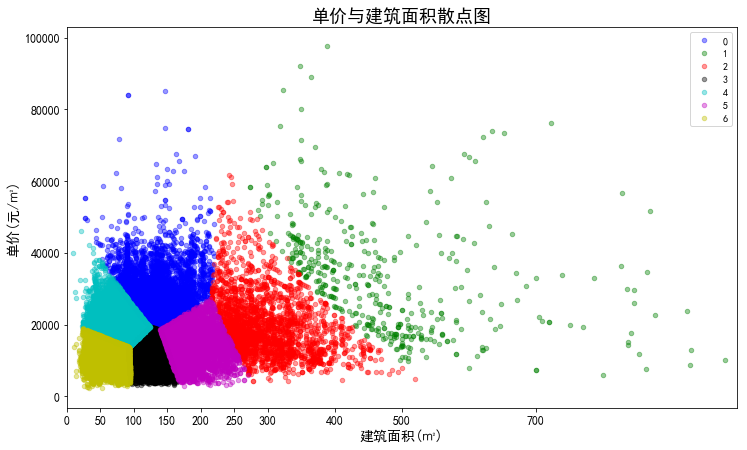

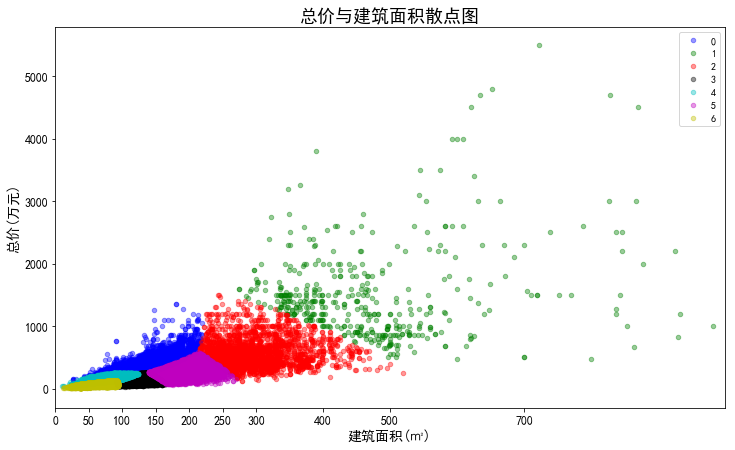

In [26]:
"""3、选定k值后，聚类分析，统计结果"""
#给定划分数量k
k = 7

#运行k-means算法    
clf = KMeansClassifier(k)
clf.fit(data_X)
labels = clf._labels

#设置存储值
data_result = [] #聚类的原始样本集（numpy数组类型）
result_mean = []#各类样本集均值结果集
data_df = []#聚类的原始样本集（dataframe类型）
colors = ['b','g','r','k','c','m','y','#e24fff','#524C90','#845868']

#统计均值结果
for i in range(k):
    index = np.nonzero(labels==i)[0]#取出所有属于第i个簇的索引值
    data_i = data_X[index]    #取出属于第i个簇的所有样本点
    data_result.append(data_i)
    mean_data = data_i.mean(axis=0)
    mean_data = list(map(int,mean_data))
    result_mean.append(list(mean_data))

#变换数组结构
for i in range(k):
    data_temp = data_result[i]
    data = {"id":data_temp[:,0],
            "price":data_temp[:,1],
            "unit_price":data_temp[:,2],
            "construction_area":data_temp[:,3],
            "lat":data_temp[:,4],
            "lng":data_temp[:,5]}
    data_df_temp = pd.DataFrame(data,columns=["id","price","unit_price","construction_area","lat","lng"])
    data_df.append(data_df_temp)
    
#输出统计结果
gr = 0
print("                     k-means算法统计结果")
print(" 分组	总价（万）	单价（元/平米）  建筑面积（平米）   总计")
for i in result_mean:
    print(" "+str(gr)+"         "+str(i[1])+" 		"+str(i[2])+"   	"+str(i[3])+"\t\t"+str(len(data_df[gr])))
    gr = gr + 1
    

"""4、聚类结果：单价与建筑面积的散点图"""   
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.set_title("单价与建筑面积散点图",fontsize=18)
data_df[0].plot(x="construction_area", y="unit_price", kind="scatter",label="0",color=colors[0],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500,700],xlim=[0,1000])
data_df[1].plot(x="construction_area", y="unit_price", kind="scatter",label="1",color=colors[1],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500,700],xlim=[0,1000])
data_df[2].plot(x="construction_area", y="unit_price", kind="scatter",label="2",color=colors[2],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500,700],xlim=[0,1000])
data_df[3].plot(x="construction_area", y="unit_price", kind="scatter",label="3",color=colors[3],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500,700],xlim=[0,1000])
data_df[4].plot(x="construction_area", y="unit_price", kind="scatter",label="4",color=colors[4],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500,700],xlim=[0,1000])
data_df[5].plot(x="construction_area", y="unit_price", kind="scatter",label="5",color=colors[5],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500,700],xlim=[0,1000])
data_df[6].plot(x="construction_area", y="unit_price", kind="scatter",label="6",color=colors[6],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500,700],xlim=[0,1000])
ax.set_xlabel("建筑面积(㎡)",fontsize=14)
ax.set_ylabel("单价(元/㎡)",fontsize=14)

"""5、聚类结果：总价价与建筑面积的散点图"""
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.set_title("总价与建筑面积散点图",fontsize=18)
data_df[0].plot(x="construction_area", y="price", kind="scatter",label="0",color=colors[0],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500,700],xlim=[0,1000])
data_df[1].plot(x="construction_area", y="price", kind="scatter",label="1",color=colors[1],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500,700],xlim=[0,1000])
data_df[2].plot(x="construction_area", y="price", kind="scatter",label="2",color=colors[2],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500,700],xlim=[0,1000])
data_df[3].plot(x="construction_area", y="price", kind="scatter",label="3",color=colors[3],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500,700],xlim=[0,1000])
data_df[4].plot(x="construction_area", y="price", kind="scatter",label="4",color=colors[4],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500,700],xlim=[0,1000])
data_df[5].plot(x="construction_area", y="price", kind="scatter",label="5",color=colors[5],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500,700],xlim=[0,1000])
data_df[6].plot(x="construction_area", y="price", kind="scatter",label="6",color=colors[6],fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500,700],xlim=[0,1000])
ax.set_xlabel("建筑面积(㎡)",fontsize=14)
ax.set_ylabel("总价(万元)",fontsize=14)

In [27]:
"""6、生成地图文件"""
count = 0
for data_map in data_df:
    out_map = "./webposition/"+str(count)+".js"
    with open(out_map,"w") as file_out:
        for lng,lat,price in zip(list(data_map["lng"]),list(data_map["lat"]),list(data_map["price"])):
            #out = str(lng)+","+str(lat)
            out='{\"lng\":'+str(lng)+',\"lat\":'+str(lat)+',\"count\":'+str(price)+'},'
            file_out.write(out)
            file_out.write("\n")
    print('finished:{}'.format(count))
    count = count + 1

finished:0
finished:1
finished:2
finished:3
finished:4
finished:5
finished:6
